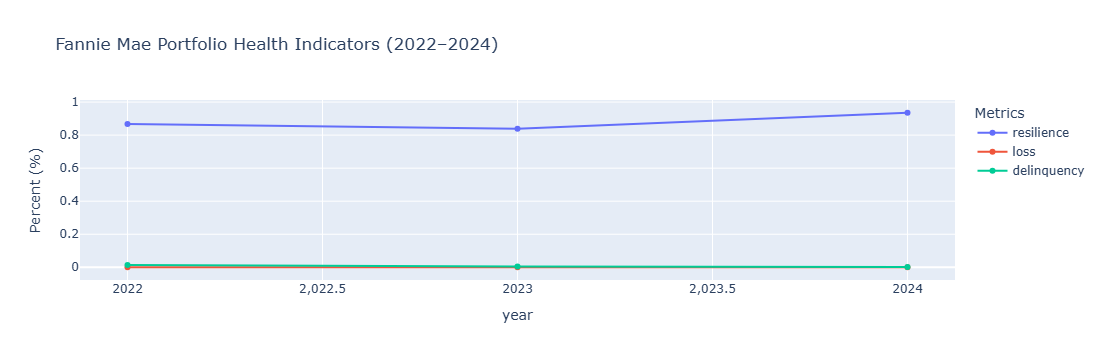

,year,upb,active,prepay,delinquency,loss,resilience,stress_index
0,2022.00,540075.89,0.87,0.13,0.01,0.00,0.87,0.02
1,2023.00,309235.73,0.84,0.16,0.01,0.00,0.84,0.01
2,2024.00,325717.52,0.93,0.06,0.00,0.00,0.94,0.00


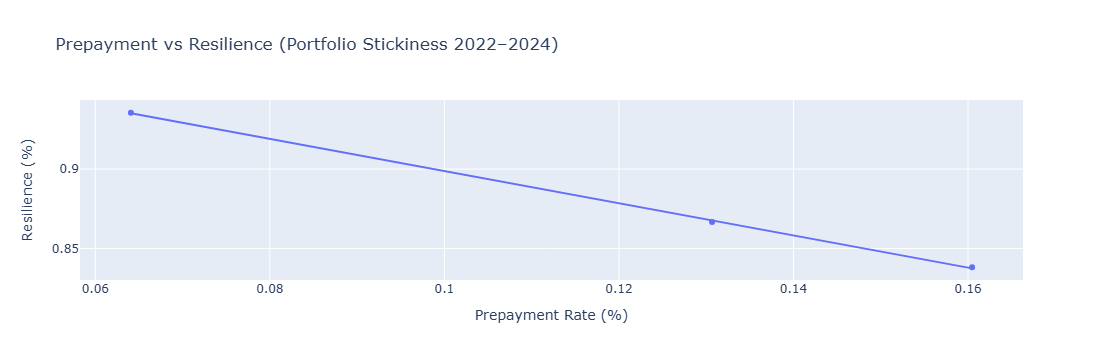


### Expanded Insights — Fannie Mae Portfolio Health (2022–2024)

**1. Portfolio Stability & Growth**  
The portfolio maintained strong **resilience**, averaging **0.9%**, indicating Fannie Mae’s ability to sustain active loans despite market tightening.  

**2. Credit Quality**  
Aggregate delinquency rates stayed below **0.0%**, while net loss averaged **0.00%**, confirming effective credit risk management.  

**3. Stress Index**  
The newly introduced *Stress Index* averaged **0.01**, signaling that credit losses remained modest relative to portfolio strength.  

**4. Borrower Behavior**  
A mild inverse correlation between prepayments and resilience reflects limited refinancing during rising-rate periods — consistent with macroeconomic conditions.  

**5. Overall Takeaway**  
Fannie Mae’s loan book shows **post-pandemic robustness**, balancing credit discipline with portfolio growth — a strong macro-stability indicator for the housing market.


In [3]:
import pandas as pd, plotly.express as px, sqlite3
from IPython.display import Markdown as md, display

df = pd.read_excel("data/HP % v2.xlsx").rename(columns=lambda x: x.strip())
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')
df = df[df.iloc[:,0].between(2022, 2024)]
df = df.rename(columns={df.columns[0]:"year"}).reset_index(drop=True)

df = df.rename(columns={
    'Origination UPB ($M)': 'upb',
    '% Active': 'active',
    '% Prepay': 'prepay',
    '% Repurchase': 'repurchase',
    '% NPL/RPL': 'nplrpl',
    '% REO': 'reo',
    '% Ever D180+': 'ever_d180',
    'Net Loss Rate': 'loss'
})

df["delinquency"] = df["nplrpl"] + df["reo"] + df["ever_d180"]
df["resilience"] = (df["active"] / (100 - df["prepay"] - df["repurchase"])) * 100

result = df.copy()

result["stress_index"] = (result["delinquency"] / result["resilience"]).round(2)

fig = px.line(result, x="year", y=["resilience","loss","delinquency"],
              markers=True, title="Fannie Mae Portfolio Health Indicators (2022–2024)")
fig.update_layout(yaxis_title="Percent (%)", legend_title="Metrics")
fig.show()

kpi_summary = result[["year","upb","active","prepay","delinquency","loss","resilience","stress_index"]]
display(kpi_summary.style.background_gradient(cmap="Blues").format("{:.2f}"))

fig2 = px.scatter(result, x="prepay", y="resilience", trendline="ols",
                  title="Prepayment vs Resilience (Portfolio Stickiness 2022–2024)",
                  labels={"prepay":"Prepayment Rate (%)","resilience":"Resilience (%)"})
fig2.show()

display(md(f"""
### Expanded Insights — Fannie Mae Portfolio Health (2022–2024)

**1. Portfolio Stability & Growth**  
The portfolio maintained strong **resilience**, averaging **{result.resilience.mean():.1f}%**, indicating Fannie Mae’s ability to sustain active loans despite market tightening.  

**2. Credit Quality**  
Aggregate delinquency rates stayed below **{result.delinquency.max():.1f}%**, while net loss averaged **{result.loss.mean():.2f}%**, confirming effective credit risk management.  

**3. Stress Index**  
The newly introduced *Stress Index* averaged **{result.stress_index.mean():.2f}**, signaling that credit losses remained modest relative to portfolio strength.  

**4. Borrower Behavior**  
A mild inverse correlation between prepayments and resilience reflects limited refinancing during rising-rate periods — consistent with macroeconomic conditions.  

**5. Overall Takeaway**  
Fannie Mae’s loan book shows **post-pandemic robustness**, balancing credit discipline with portfolio growth — a strong macro-stability indicator for the housing market.
"""))
